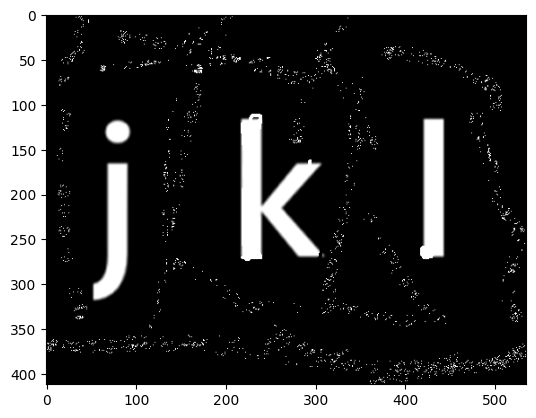

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Images/three.jpeg', cv.IMREAD_GRAYSCALE)
img = 255-img #cv.imread('Images/jkl.png', cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")


## 1. Erosion
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let's see it how it works:

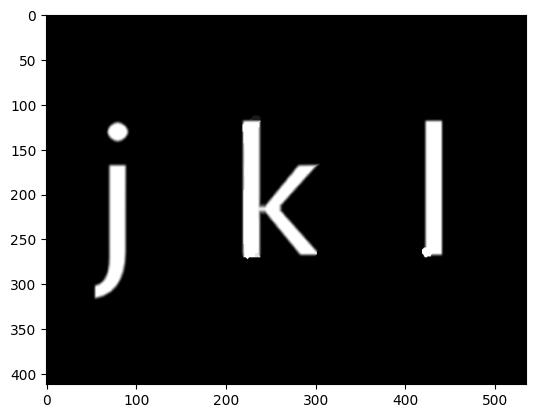

In [2]:
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
plt.imshow(erosion, cmap="gray")

## 2. Dilation
It is just opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

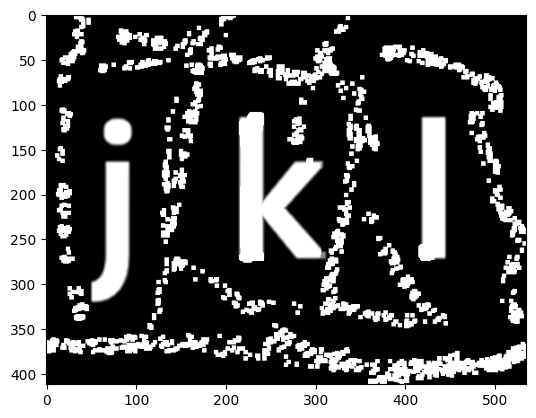

In [3]:
dilation = cv.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

### 3. Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()



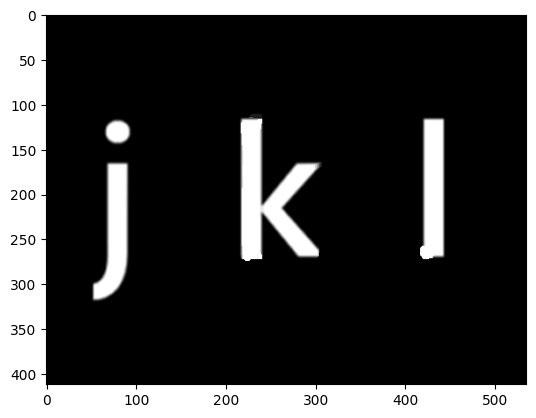

In [4]:
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.imshow(opening,cmap="gray")

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

### 4. Closing

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

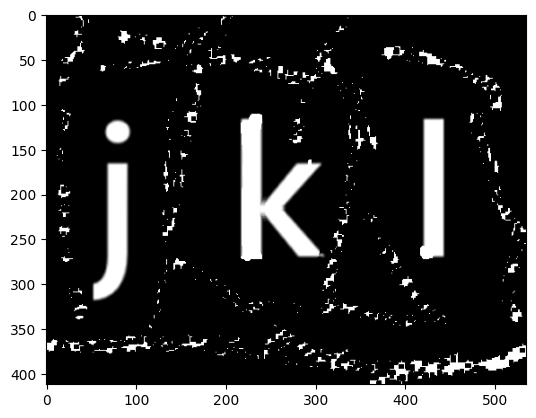

In [5]:
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="gray")


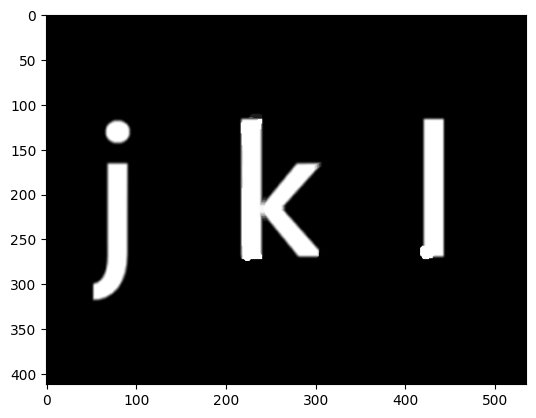

In [6]:
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="gray")


### 5. Morphological Gradient

It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

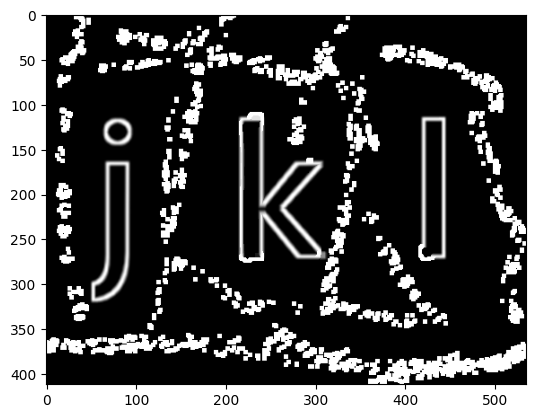

In [7]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.imshow(gradient,cmap="gray")


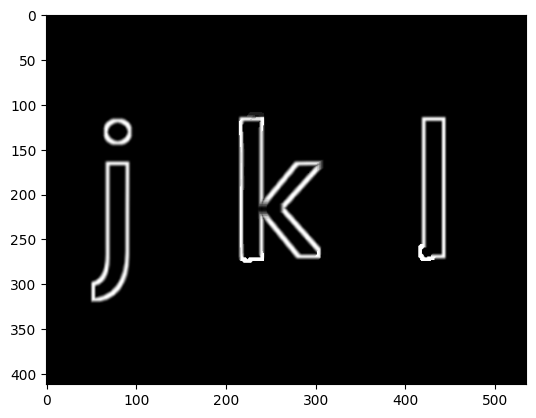

In [8]:
gradient = cv.morphologyEx(closing, cv.MORPH_GRADIENT, kernel)
plt.imshow(gradient,cmap="gray")


 ### 6. Top Hat

It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

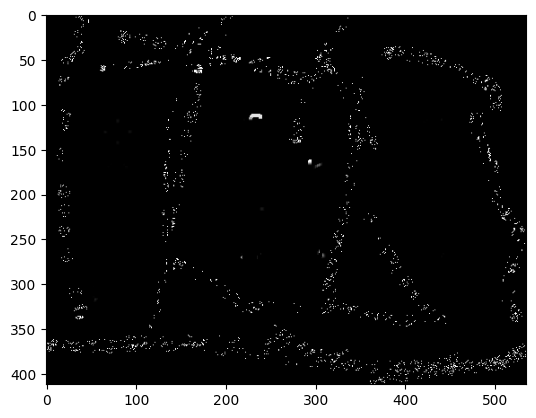

In [9]:
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plt.imshow(tophat,cmap="gray")


### 7. Black Hat

It is the difference between the closing of the input image and input image.
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

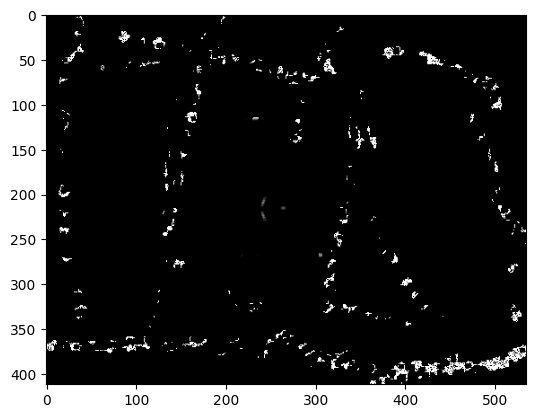

In [10]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat,cmap="gray")


### Structuring Element

We manually created a structuring elements in the previous examples with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel. 

In [11]:
cv.getStructuringElement(cv.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [12]:
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [13]:
cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

https://homepages.inf.ed.ac.uk/rbf/HIPR2/hitmiss.htm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/skeleton.htm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm